<a href="https://colab.research.google.com/github/ritsika/person-identification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from glob import glob

base_dir = '/content/processed_dataset/processed_dataset/train'

# Preprocessing
IMAGE_SIZE = (224, 224)  # Change to a tuple
BATCH_SIZE = 16

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation'
)

vgg = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

folders = sorted(glob(os.path.join(base_dir, '*')))
class_names = [os.path.basename(folder) for folder in folders]

x = layers.Flatten()(vgg.output)
prediction = layers.Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 3
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Found 42 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                

1/1 [==============================] - 0s 379ms/step
Predicted class: abitha


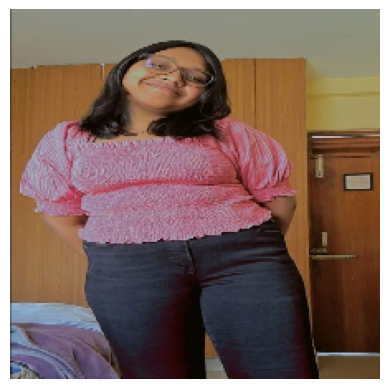

In [ ]:
import matplotlib.pyplot as plt
test_image_path = "/content/WhatsApp Image 2023-06-04 at 6.50.35 PM.jpeg"
img_pred = image.load_img(test_image_path, target_size=IMAGE_SIZE)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred / 255.0
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
predicted_class_index = np.argmax(rslt)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)
plt.imshow(img_pred[0])
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 375ms/step
Predicted class: ritsika


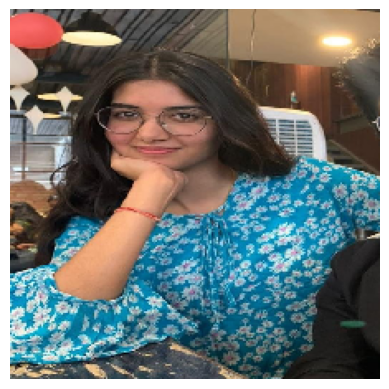

In [ ]:
import matplotlib.pyplot as plt
test_image_path = "/content/WhatsApp Image 2023-06-06 at 1.20.38 AM.jpeg"
img_pred = image.load_img(test_image_path, target_size=IMAGE_SIZE)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred / 255.0
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
predicted_class_index = np.argmax(rslt)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)
plt.imshow(img_pred[0])
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 373ms/step
Predicted class: akash


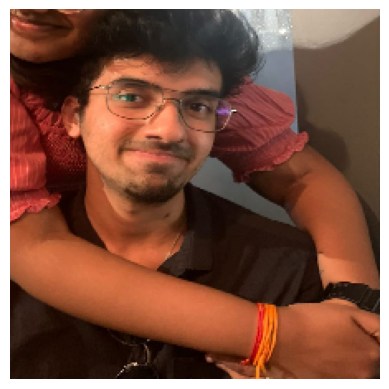

In [ ]:
import matplotlib.pyplot as plt
test_image_path = "/content/WhatsApp Image 2023-06-06 at 1.25.14 AM.jpeg"
img_pred = image.load_img(test_image_path, target_size=IMAGE_SIZE)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred / 255.0
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
predicted_class_index = np.argmax(rslt)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)
plt.imshow(img_pred[0])
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 383ms/step
Predicted class: ritsika


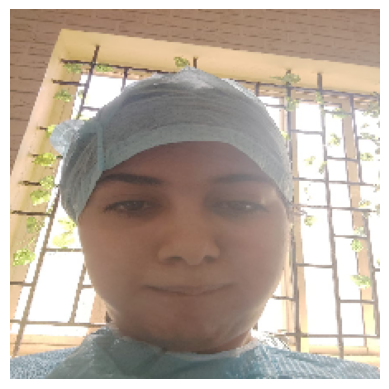

In [ ]:
import matplotlib.pyplot as plt
test_image_path = "/content/WhatsApp Image 2023-06-13 at 12.33.24 AM.jpeg"
img_pred = image.load_img(test_image_path, target_size=IMAGE_SIZE)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred / 255.0
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
predicted_class_index = np.argmax(rslt)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)
plt.imshow(img_pred[0])
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 380ms/step
Predicted class: abitha


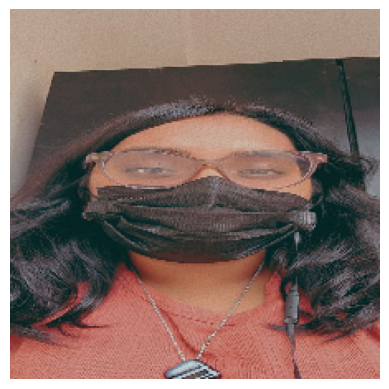

In [ ]:
import matplotlib.pyplot as plt
test_image_path = "/content/WhatsApp Image 2023-06-13 at 12.38.06 AM.jpeg"
img_pred = image.load_img(test_image_path, target_size=IMAGE_SIZE)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred / 255.0
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
predicted_class_index = np.argmax(rslt)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)
plt.imshow(img_pred[0])
plt.axis("off")
plt.show()

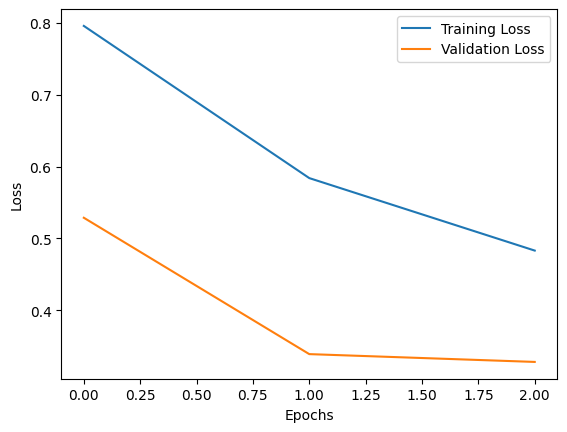

1/1 [==============================] - 1s 1s/step - loss: 0.3279 - accuracy: 1.0000
Total Accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt

# Plot the loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate the total accuracy
_, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print('Total Accuracy:', accuracy)